
# EDA BITCOIN


## ¿Qué es BITCOIN?

Bitcoin (BTC) es una criptomoneda, es decir, una moneda digital descentralizada que funciona sin la necesidad de un banco central. Se basa en tecnología blockchain, un libro contable público y distribuido donde se registran todas las transacciones. Su precio es altamente volátil debido a la oferta y demanda, noticias económicas, regulaciones y otros factores externos.


## Descripción de los datos

El dataset contiene datos financieros históricos del mercado de Bitcoin con frecuencias de: 1 hora, 4 horas, 1dia y 15 minutos; cubriendo el periodo desde el 1 de enero de 2018 hasta 6 de febrero de 2025. Los datos permiten analizar el comportamiento de precios y volúmenes de Bitcoin, incluyendo tendencias, volatilidad y actividad del mercado. Contiene las siguientes variables:

- Precio de apertura (Open): El precio al que Bitcoin comenzó a cotizar en un periodo determinado (15 min, 1h,  4h o 1d).

- Precio de cierre (Close): El último precio registrado en ese mismo periodo.

- Máximo y mínimo (High & Low): Los valores más alto y más bajo de Bitcoin en ese periodo.

- Volumen (Volume): La cantidad total de Bitcoin negociado.

- Quote asset volume: Volumen total de transacciones expresado en el activo cotizado (USD).

- Number of trades: Número total de transacciones realizadas en el periodo.

- Taker buy base asset volume: Volumen de compra por los compradores (takers) expresado en el activo base (Bitcoin).

- Taker buy quote asset volume: Volumen de compra por los compradores (takers) expresado en el activo cotizado (USD).

- Retorno (Return): La variación porcentual del precio entre periodos consecutivos.

- Volatilidad: Una medida de qué tan variable es el precio en un periodo de tiempo.


## Objetivo del análisis

El objetivo de este EDA es comprender la estructura de los datos de Bitcoin, identificar patrones temporales (tendencia, estacionalidad, ciclos), detectar anomalías y preparar los datos para la aplicación de modelos predictivos o de pronóstico.



# Análisis exploratorio de datos - BITCOIN

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose  # Importación corregida
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [35]:
# Cargat datos

data_folder = "BTCBinance"

# Archivos específicos a leer
files = {
    "1d": "btc_1d_data_2018_to_2025.csv",
    "4h": "btc_4h_data_2018_to_2025.csv",
    "1h": "btc_1h_data_2018_to_2025.csv",
    
}

# Leer los datasets y procesarlos
dfs = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)  # Ruta completa
    df = pd.read_csv(file_path, parse_dates=["Open time"], index_col="Open time")  # Leer con fecha como índice
    dfs[key] = df[["Open", "High", "Low", "Close", "Volume"]]  # Mantener columnas relevantes
    
    # Eliminar columna "Ignore" y seleccionar columnas relevantes
    df = df.drop(columns=["Ignore"])  # Eliminar columna
    dfs[key] = df[["Open", "High", "Low", "Close", "Volume"]]  # Mantener columnas clave

## Análisis preliminar

In [36]:
## Inspección general.
for key, df in dfs.items():
    print(f"Frecuencia: {key}")
    print(f"Dimensiones: {df.shape}")
    print("Primeras filas:")
    print(df.head())
    print("Últimas filas:")
    print(df.tail())
    print("Valores faltantes por columna:")
    print(df.isnull().sum())
    print("-" * 30)

Frecuencia: 1d
Dimensiones: (2594, 5)
Primeras filas:
                Open      High       Low     Close        Volume
Open time                                                       
2018-01-01  13715.65  13818.55  12750.00  13380.00   8609.915844
2018-01-02  13382.16  15473.49  12890.02  14675.11  20078.092111
2018-01-03  14690.00  15307.56  14150.00  14919.51  15905.667639
2018-01-04  14919.51  15280.00  13918.04  15059.54  21329.649574
2018-01-05  15059.56  17176.24  14600.00  16960.39  23251.491125
Últimas filas:
                 Open       High        Low      Close       Volume
Open time                                                          
2025-02-02  100635.66  101456.60   99747.59   99796.00   3149.62233
2025-02-03   97700.59   97782.79   91231.00   94495.21  20992.95572
2025-02-04  101328.51  101660.94  100743.33  101367.77   1910.35542
2025-02-05   97763.14   98930.44   97131.43   97589.30   8160.56795
2025-02-06   96612.44   99120.00   96430.78   98329.13   8315.06445


In [37]:
## Estadísticas descriptivas
for freq, df in dfs.items():
    print(f'\n=== Estadísticas descriptivas ({freq}) ===')
    print(df.describe())


=== Estadísticas descriptivas (1d) ===
                Open           High            Low          Close  \
count    2594.000000    2594.000000    2594.000000    2594.000000   
mean    29057.847182   29743.249383   28327.995451   29090.193446   
std     23539.635421   24046.515394   23021.304519   23576.229505   
min      3211.710000    3276.500000    3156.260000    3211.720000   
25%      9067.985000    9261.240000    8765.000000    9068.840000   
50%     22712.950000   23252.895000   22257.575000   22741.115000   
75%     43484.365000   44293.657500   42487.500000   43527.390000   
max    106143.820000  108353.000000  105321.490000  106143.820000   

              Volume  
count    2594.000000  
mean    70821.588903  
std     80473.318599  
min      1521.537318  
25%     29769.803371  
50%     44833.178030  
75%     73702.302851  
max    760705.362783  

=== Estadísticas descriptivas (4h) ===
                Open           High            Low          Close  \
count   15543.000000  

El análisis de los datos de Bitcoin entre enero de 2018 y febrero de 2025 revela una volatilidad extrema y un crecimiento notable, con precios oscilando entre $3,156.26 y $108,353.00. Durante este período, el precio medio de cierre se situó en $29,090.19, con una elevada desviación estándar de $23,576.22, confirmando la importante variabilidad del mercado. 

El volumen diario promedio alcanzó las 70,821 unidades, con máximos de 760,705 unidades en momentos de intensa actividad comercial. Los rendimientos diarios muestran un promedio de 0.14%, con caídas extremas de hasta -39.50% y alzas de hasta 19.53% en un solo día, mientras que la mediana positiva del 0.07% sugiere una tendencia general alcista a pesar de la volatilidad.

La comparación entre distintas frecuencias temporales (diaria, 4 horas y 1 hora) muestra consistencia en los valores medios y revela significativas fluctuaciones intradiarias, observándose además una distribución desigual del volumen a lo largo del día.

## Visualización de la serie

### Visualización temporal

Con el objetivo de observar la tendencia general y posibles anomalías.

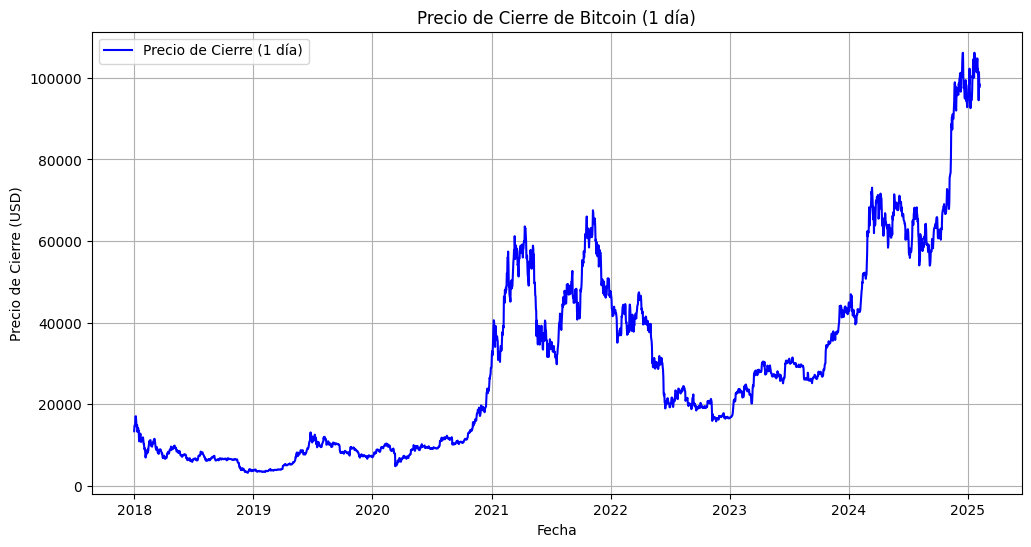

In [38]:
# Gráfica de línea para el precio de cierre (solo fr de 1 día)
plt.figure(figsize=(12, 6))
plt.plot(dfs["1d"].index, dfs["1d"]["Close"], label="Precio de Cierre (1 día)", color="blue")
plt.title("Precio de Cierre de Bitcoin (1 día)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.grid()
plt.show()

La gráfica muestra el precio de cierre diario de Bitcoin (BTC) en dólares estadounidenses desde 2018 hasta principios de 2025. Analizando los movimientos más significativos:

2018-2020: Período relativamente estable con precios oscilando entre $5,000 y $10,000, mostrando una fase de consolidación después del bull run de 2017.

2020-2021: Fuerte tendencia alcista, con el precio aumentando dramáticamente desde aproximadamente $10,000 hasta alcanzar picos cercanos a los $60,000-$65,000.

2022: Un año volátil con precios fluctuando principalmente entre $30,000 y $50,000, seguido de una tendencia bajista.

2023: Período de acumulación y recuperación gradual, con el precio consolidándose inicialmente alrededor de $20,000-$30,000 antes de comenzar una nueva tendencia alcista.

2024-2025: Nueva fase alcista significativa, con el precio superando los máximos históricos anteriores y alcanzando niveles cercanos a los $100,000.

Los patrones muestran la naturaleza cíclica de Bitcoin, con períodos de acumulación seguidos por fuertes movimientos alcistas y posteriores correcciones. El último movimiento alcista (2024-2025) es particularmente notable por su magnitud y por establecer nuevos máximos históricos.

### Análisis de Estacionalidad y Periodicidad

Descomposición de la serie en tendencia, estacionalidad y residuales.

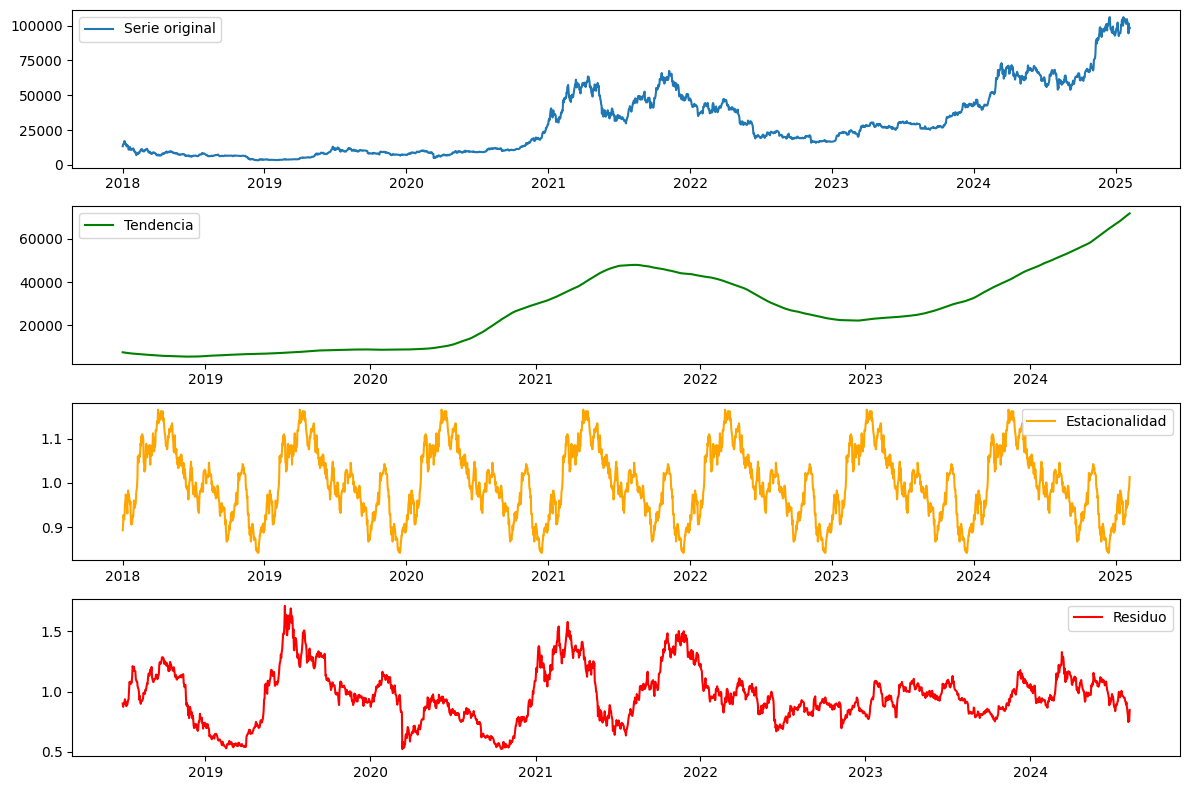

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal para la frecuencia diaria
freq = "1d"
df = dfs[freq]

result = seasonal_decompose(df["Close"], model="multiplicative", period=365)  # Periodo aproximado de 1 año

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df["Close"], label="Serie original")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(result.trend, label="Tendencia", color="green")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label="Estacionalidad", color="orange")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label="Residuo", color="red")
plt.legend()

plt.tight_layout()
plt.show()


En el primer panel, y como ya se vio anteriormente, la serie original muestra el precio de Bitcoin con su alta volatilidad, comenzando alrededor de $10,000 en 2018, experimentando dos ciclos alcistas significativos (2021 y 2024-2025), con el precio máximo superando los $100,000 a principios de 2025.

El segundo panel muestra la tendencia subyacente, que filtra las fluctuaciones a corto plazo, revelando tres fases principales: un período estable entre 2018-2020, un ciclo alcista y bajista entre 2021-2022, y una nueva fase alcista desde 2023 hasta 2025, sugiriendo ciclos aproximadamente de 4 años.

El tercer panel presenta el componente estacional, que muestra patrones recurrentes dentro de cada año con fluctuaciones entre 0.85 y 1.15, indicando que Bitcoin tiende a tener períodos predecibles de mayor y menor actividad que se repiten anualmente.

Finalmente, el componente residual en el cuarto panel captura las fluctuaciones irregulares no explicadas por la tendencia o estacionalidad, mostrando la naturaleza impredecible del mercado de Bitcoin, con momentos de alta volatilidad inexplicable, especialmente durante 2019-2020 y 2021-2022.

### Detección de Anomalías 

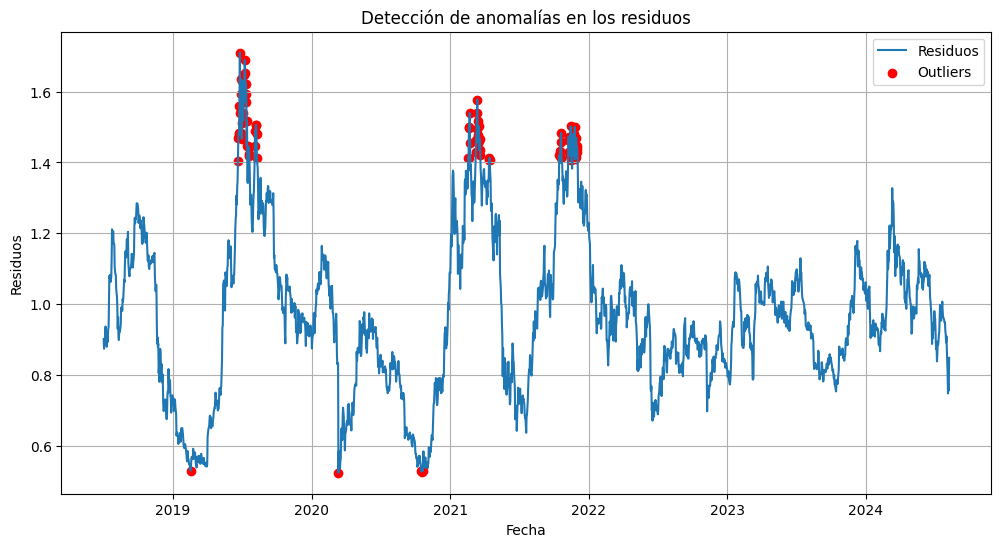

In [40]:
# Detección de anomalías
# Usamos el método de desviación estándar para detectar outliers
residuals = result.resid.dropna()  # Residuos de la descomposición
mean_residual = residuals.mean()
std_residual = residuals.std()
outliers = residuals[(residuals > mean_residual + 2 * std_residual) | (residuals < mean_residual - 2 * std_residual)]

plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label="Residuos")
plt.scatter(outliers.index, outliers, color='red', label="Outliers")
plt.title("Detección de anomalías en los residuos")
plt.xlabel("Fecha")
plt.ylabel("Residuos")
plt.legend()
plt.grid()
plt.show()

En esta gráfica, los residuos de la descomposición de la serie temporal se muestran en azul, y los valores atípicos (outliers) se resaltan en rojo.

Los outliers son puntos que se desvían significativamente de la media de los residuos (más de 2 desviaciones estándar). En el contexto de Bitcoin, estos outliers podrían estar relacionados con eventos extremos en el mercado, como noticias importantes, cambios regulatorios, o movimientos bruscos en el precio.

Dado que Bitcoin es altamente volátil, es normal ver varios outliers, especialmente en periodos de alta volatilidad.

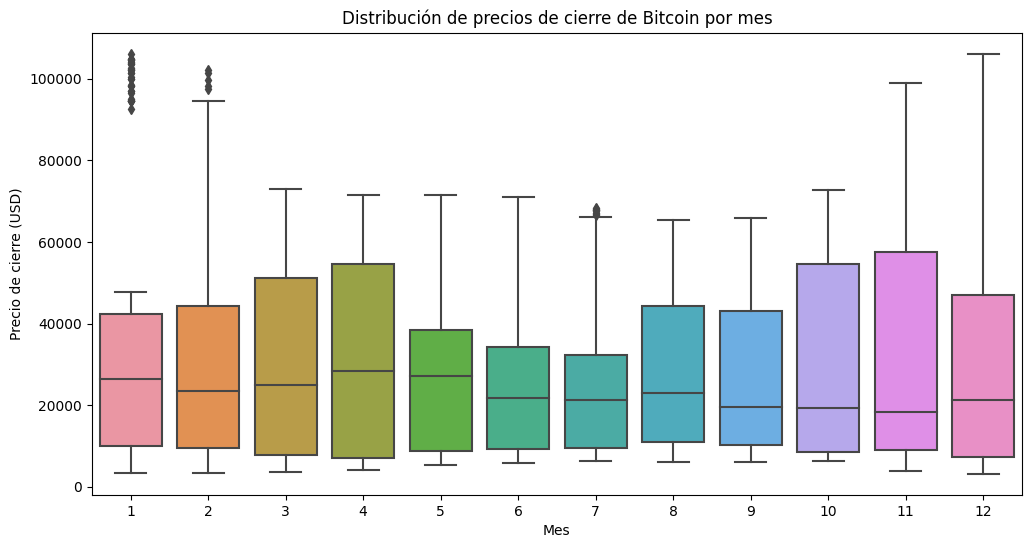

In [41]:
# 4.1 Diagramas de caja por periodo (meses)
plt.figure(figsize=(12, 6))
sns.boxplot(x=dfs["1d"].index.month, y=dfs["1d"]["Close"])
plt.title("Distribución de precios de cierre de Bitcoin por mes")
plt.xlabel("Mes")
plt.ylabel("Precio de cierre (USD)")
plt.show()

### Análisis de autocorrelación


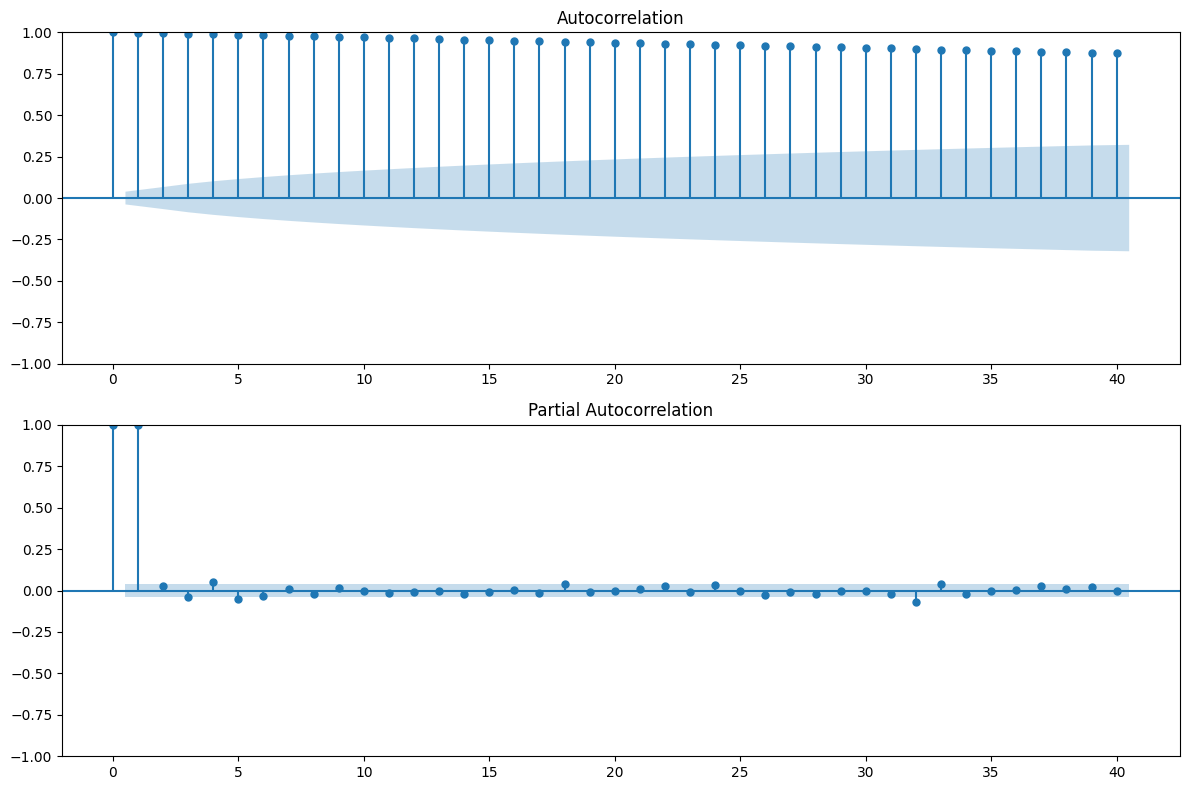

In [42]:
# Para variable CLOSE - Frecuencia 1dia

plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(dfs["1d"]["Close"], lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(dfs["1d"]["Close"], lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()

El análisis de autocorrelación (ACF) del precio de Bitcoin revela una serie temporal con memoria persistente, donde los valores mantienen correlaciones significativas incluso después de 40 períodos. Esta fuerte dependencia temporal que no disminuye rápidamente es característica de series no estacionarias con tendencias marcadas, sugiriendo que el precio de Bitcoin de hoy está influenciado no solo por sus valores recientes sino también por su comportamiento histórico más distante. Este patrón confirma la necesidad de aplicar técnicas de diferenciación para lograr estacionariedad antes de implementar modelos predictivos.

Por otro lado, la función de autocorrelación parcial (PACF) muestra un patrón contrastante, con correlaciones significativas únicamente en los primeros dos rezagos y valores que caen rápidamente dentro de las bandas de significancia estadística para rezagos mayores. Esta estructura sugiere que un modelo autorregresivo de orden bajo (AR(1) o AR(2)) sería apropiado para modelar la dinámica del precio de Bitcoin una vez eliminada la tendencia. En términos prácticos, esto indica que para predecir el precio, los dos valores más recientes contienen la mayor parte de la información relevante.

### Análisis de tendencia

c:\Users\mcvar\anaconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mcvar\anaconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


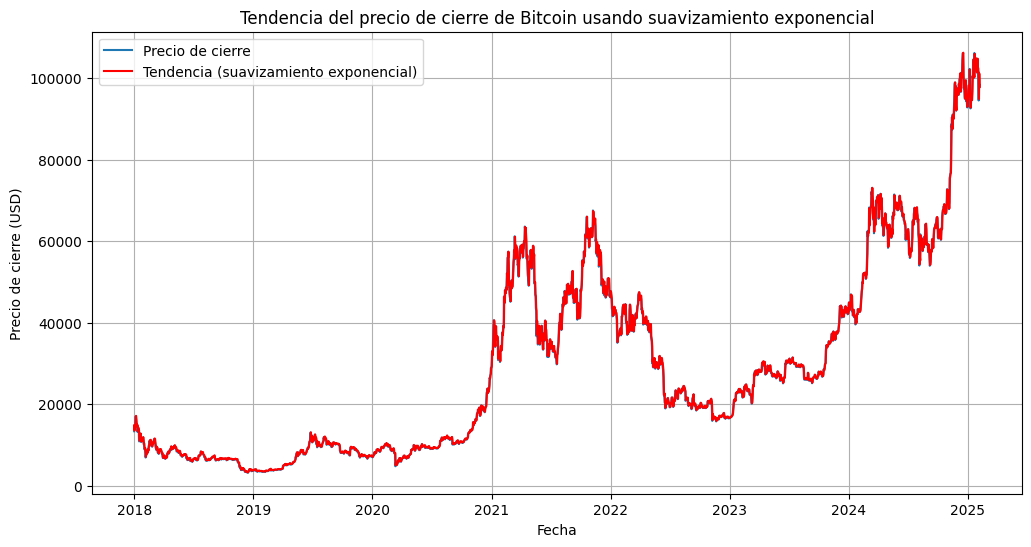

In [50]:
# 5. Análisis de tendencia - Suavizamiento exponencial
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aplicar suavizamiento exponencial
model = ExponentialSmoothing(dfs["1d"]["Close"], trend="add", seasonal=None)
fit = model.fit()

# Graficar la tendencia
plt.figure(figsize=(12, 6))
plt.plot(dfs["1d"].index, dfs["1d"]["Close"], label="Precio de cierre")
plt.plot(dfs["1d"].index, fit.fittedvalues, label="Tendencia (suavizamiento exponencial)", color="red")
plt.title("Tendencia del precio de cierre de Bitcoin usando suavizamiento exponencial")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.grid()
plt.show()

### Análisis de Estacionaridad

In [44]:
# Prueba de Dickey-Fuller aumentada (ADF)

def test_stationarity(timeseries):
    print('Resultados de la prueba de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estadístico', 'p-valor', '#Lags', 'Observaciones'])
    for key, value in dftest[4].items():
        dfoutput[f'Valor crítico ({key})'] = value
    print(dfoutput)

test_stationarity(dfs["1d"]["Close"])


Resultados de la prueba de Dickey-Fuller:
Estadístico              -0.040965
p-valor                   0.955010
#Lags                    28.000000
Observaciones          2565.000000
Valor crítico (1%)       -3.432902
Valor crítico (5%)       -2.862667
Valor crítico (10%)      -2.567370
dtype: float64


Estos resultados de la prueba de Dickey-Fuller para la serie temporal del precio de Bitcoin indican claramente que la serie no es estacionaria. El estadístico de prueba de -0.040965 está muy por encima de todos los valores críticos, incluso del menos estricto al 10% (-2.567370). El p-valor extremadamente alto de 0.955010 confirma que no podemos rechazar la hipótesis nula de que existe una raíz unitaria en la serie.

Esta prueba confirma formalmente lo que sugerían los gráficos de autocorrelación: el precio de Bitcoin presenta una tendencia persistente y no revierte a una media constante a lo largo del tiempo. Para realizar análisis estadísticos adecuados o construir modelos predictivos, sería necesario transformar la serie mediante diferenciación u otros métodos para conseguir estacionariedad. Este resultado es típico en series de precios de activos financieros y coincide con la teoría de que los mercados financieros suelen seguir un comportamiento similar al de un paseo aleatorio.

## Transformación de datos

Resultados de la prueba de Dickey-Fuller:
Estadístico           -8.378963e+00
p-valor                2.540618e-13
#Lags                  2.800000e+01
Observaciones          2.564000e+03
Valor crítico (1%)    -3.432903e+00
Valor crítico (5%)    -2.862668e+00
Valor crítico (10%)   -2.567370e+00
dtype: float64


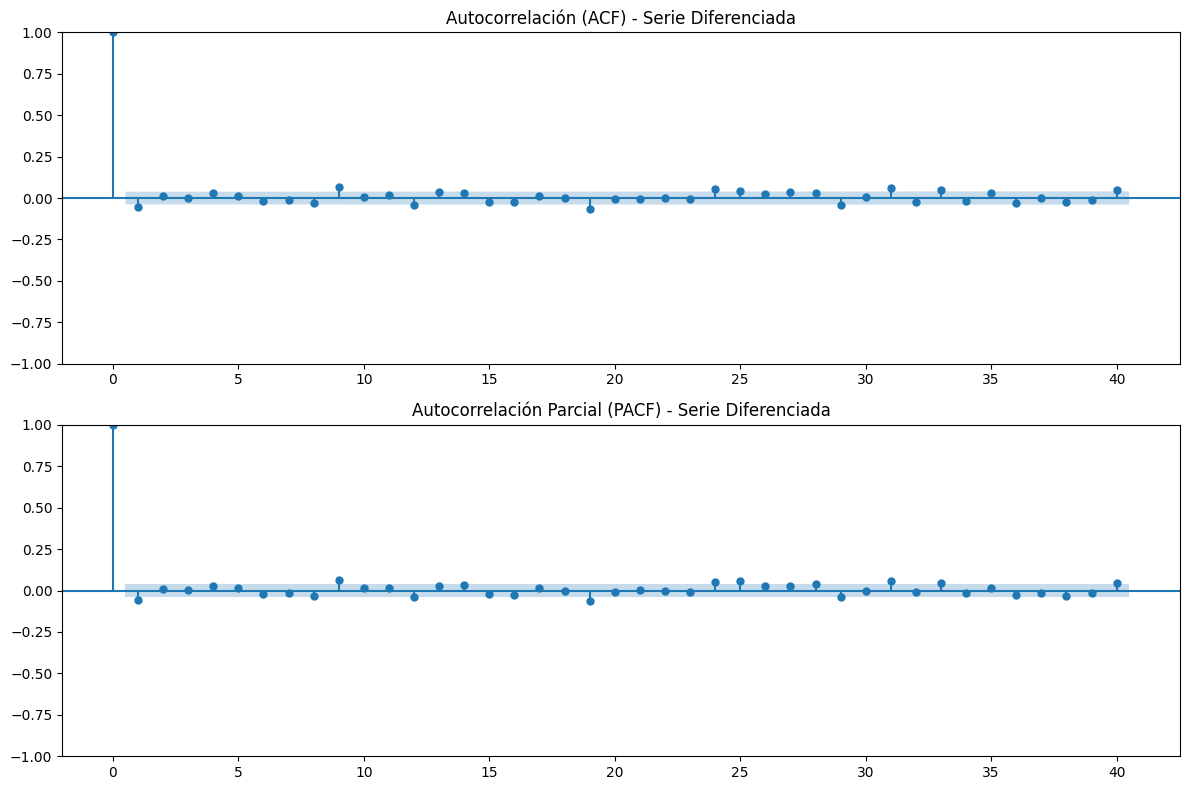

In [45]:
dfs["1d"]["Close_diff"] = dfs["1d"]["Close"].diff()
test_stationarity(dfs["1d"]["Close_diff"].dropna())

# Graficar ACF Y PACF de la serie diferenciada

plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(dfs["1d"]["Close_diff"].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelación (ACF) - Serie Diferenciada')

plt.subplot(212)
plot_pacf(dfs["1d"]["Close_diff"].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF) - Serie Diferenciada')

plt.tight_layout()
plt.show()


Estos resultados de la prueba de Dickey-Fuller para la serie diferenciada del precio de Bitcoin muestran un cambio drástico respecto a la serie original. El estadístico de prueba de -8.379 es significativamente menor que todos los valores críticos (-3.433 al 1%, -2.863 al 5% y -2.567 al 10%), y el p-valor extremadamente bajo de 2.54e-13 indica que podemos rechazar con gran confianza la hipótesis nula de no estacionariedad.

Esta transformación mediante diferenciación (calculando los cambios diarios en el precio en lugar de los precios absolutos) ha logrado convertir la serie temporal en estacionaria. Ahora, la serie de los cambios diarios de precios no muestra tendencia persistente y sus propiedades estadísticas se mantienen constantes a lo largo del tiempo.

Análisis de las gráficas ACF y PACF:

La función de autocorrelación (ACF) muestra que la mayoría de los rezagos están dentro del intervalo de confianza, lo que sugiere que la serie diferenciada no tiene autocorrelaciones significativas en términos de tendencia o estacionalidad fuerte.

La función de autocorrelación parcial (PACF) también indica que no hay rezagos con una autocorrelación parcial destacada, lo que sugiere que los efectos de los valores pasados en la serie diferenciada son mínimos.

Este comportamiento sugiere que la diferenciación aplicada ha sido efectiva y que la serie temporal ya no tiene una estructura de dependencia clara, lo que facilita su modelado con ARIMA.